- 와인 데이터 : 포르투갈 서북쪽 비뉴 베르드(Vinho Verde) 지방에서 만들어진 와인 측정 데이터
- ```레드와인 샘플 1,599개```, ```화이트와인 쌤플 4,898개``` 등급과 맛, 산도를 측정해 분석

# 데이터

In [ ]:
import pandas as pd
import numpy as np

# 깃허브에서 데이터 가져오기
!git clone https://github.com/taehojo/data.git

fatal: destination path 'data' already exists and is not an empty directory.


In [ ]:
pd.read_csv('./data/wine.csv', header=None)

df = pd.read_csv('./data/wine.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


- 12개 속성과 1개의 클래스(값 - 0: 화이트와인, 1: 레드와인)

|컬럼명|속성값|컬럼명|속성값|
|:---:|---:|:---:|---:|
|0|주석산 농도|6|총 아황산 농도|
|1|아세트산 농도|7|밀도|
|2|구연산 농도|8|pH|
|3|잔류 당분 농도|9|호아산칼륨 농도|
|4|염화나트륨 농도|10|알코올 도수|
|5|유리 아황산 농도|11|와인의 맛(0~10등급)|

In [ ]:
# X, y분류

X = df.drop(12, axis=1)
y = df[12]

display(X)
display(y)

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [ ]:
# 검증 데이터를 통해 최적의 모델 만들잡
# model.fit() 안에 validation_split 옵션 사용
# 학습:테스트 = 8:2 에서 8 학습데이터에서 25% 검증용으로

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조

In [ ]:
# 모델 구조 설정
model = Sequential()

# 은닉층 1 / 활성화 기준 relu
model.add(Dense(30, input_dim = 12, activation='relu'))
# 은닉층 2
model.add(Dense(12, activation='relu'))
# 은닉층 3
model.add(Dense(8, activation='relu'))

# 활성화 함수
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


# 모델 컴파일

In [ ]:
# 모델 컴파일
# 손실함수 : 2진분류 'binary_crossentropy'
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행

In [ ]:
# 모델 실행
# epochs : 몇번 공부할래?
# 검증용 : 0.8 * 0.25 
model.fit(X_train, y_train, epochs = 50, batch_size=500, validation_split=0.25)

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 0.4675 - accuracy: 0.7511 - val_loss: 0.3386 - val_accuracy: 0.8508
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3232 - accuracy: 0.8555 - val_loss: 0.2240 - val_accuracy: 0.9231
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.2565 - accuracy: 0.9253 - val_loss: 0.2203 - val_accuracy: 0.9377
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2355 - accuracy: 0.9248 - val_loss: 0.2081 - val_accuracy: 0.9254
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2221 - accuracy: 0.9266 - val_loss: 0.1959 - val_accuracy: 0.9377
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2145 - accuracy: 0.9335 - val_loss: 0.1873 - val_accuracy: 0.9369
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.9343 - val_loss: 0.1835 - val_accuracy: 0.9354
Epoch 8/50
8/8 [================

# 테스트 결과

In [ ]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print(f'Test accuracy : {(score[1])}')

41/41 [==============================] - 0s 2ms/step - loss: 0.1604 - accuracy: 0.9462
Test accuracy : 0.9461538195610046


# 학습때마다 모델의 정확도를 함께 기록하면서 저장.

In [ ]:
modelpath = './{epoch:02d}_{val_accuracy:.2f}.hdf5'

In [ ]:
from pandas.io.pickle import FilePathOrBuffer
# 학습중인 모델 저장하는 함수
from tensorflow.keras.callbacks import ModelCheckpoint
cp = ModelCheckpoint(filepath = modelpath, verbose = True)

# 모델 실행

In [ ]:
model.fit(X_train, y_train, epochs = 50, batch_size=500, validation_split=0.25, verbose=True, callbacks=[cp])

Epoch 1/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0526 - accuracy: 0.9900
Epoch 1: saving model to ./01_0.98.hdf5
8/8 [==============================] - 0s 16ms/step - loss: 0.0693 - accuracy: 0.9792 - val_loss: 0.0664 - val_accuracy: 0.9762
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0473 - accuracy: 0.9840
Epoch 2: saving model to ./02_0.98.hdf5
8/8 [==============================] - 0s 12ms/step - loss: 0.0669 - accuracy: 0.9772 - val_loss: 0.0691 - val_accuracy: 0.9762
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0514 - accuracy: 0.9820
Epoch 3: saving model to ./03_0.98.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 0.0668 - accuracy: 0.9782 - val_loss: 0.0720 - val_accuracy: 0.9754
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0811 - accuracy: 0.9700
Epoch 4: saving model to ./04_0.98.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 0.0669 - accuracy: 0.9787 - 

## 저장된 파일

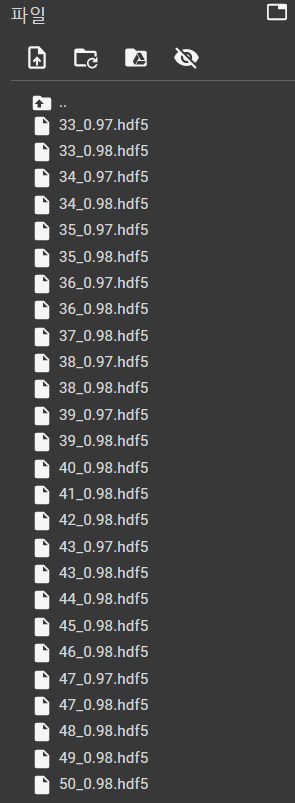

# 테스트 결과

In [ ]:
score1 = model.evaluate(X_test, y_test)
print(f'Test accuracy : {(score1[1])}')

41/41 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9815
Test accuracy : 0.9815384745597839


# 그래프로 과적합 확인하기

In [ ]:
# loss     : 학습을 통해 구한 에측값과 실제값의 차이(=오차)
# accuracy : 전체 샘플중에서정답을 맞춘 샘플이 몇 개인지 비율(=정확도)

In [ ]:
history = model.fit(X_train, y_train, epochs = 2000, batch_size=500, validation_split=0.25, 
                    # verbose=True, callbacks=[cp]
                    )

Epoch 1/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0478 - val_accuracy: 0.9831
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0469 - val_accuracy: 0.9862
Epoch 4/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9867 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 5/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.0472 - val_accuracy: 0.9854
Epoch 6/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0483 - val_accuracy: 0.9854
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0471 - val_accuracy: 0.9838
Epoch 8/2000
8/8 [=

In [ ]:
pd.DataFrame(history.history)
hisdf = pd.DataFrame(history.history)

# history는 model.fit()의 결과를 가진 파이썬 객체
# history.params에는 model.fit()설정값들이 
# history.epoch 에는 에포크 정보가 있음

# 내가 보려고 하는 손실률, 정확도등 .. history.history로 확인가능
len(hisdf)
hisdf.head()

,loss,accuracy,val_loss,val_accuracy
0,0.045884,0.985630,0.047774,0.983077
1,0.046925,0.985373,0.047025,0.986154
2,0.049650,0.984090,0.046916,0.986154
3,0.045682,0.986656,0.046561,0.986154
4,0.044674,0.987170,0.047218,0.985385


In [ ]:
# y_vloss : 검증데이터에서 얻은 오차 val_loss
# y_loss  : 학습데이터에서 얻은 오차 loss

y_vloss = hisdf['val_loss']
y_loss = hisdf['loss']

# 시각화

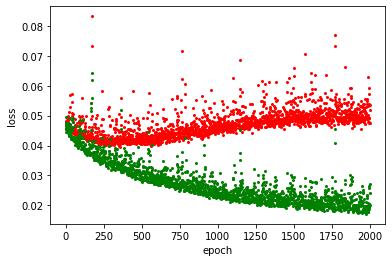

In [ ]:
import matplotlib.pyplot as plt

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, 'o', c = 'red', markersize = 2, label = 'Test_loss')
plt.plot(x_len, y_loss, 'o', c = 'green', markersize = 2, label = 'Train_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 초록색은 학습이 오래 진행될수록 줄어들지만
- 빨간색은 학습이 오래 진행될수록 커지고있음

※ 검증데이터 오차가 커지기 직전까지 학습한 모델이 최적의 횟수로 학습한 모델임.
- 그 전까지 학습하고 자동으로 중단하고 모델을 저장 ! 
